In [3]:
import pandas as pd
from  google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer

from keras.layers import Dense, LSTM, BatchNormalization, Dropout, Input,Flatten,Embedding,Activation
from keras.layers import Bidirectional, Concatenate
from keras.initializers import Constant
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy as CC
from keras.activations import relu, softmax
from keras.initializers import he_uniform, glorot_uniform
from keras.metrics import AUC
from keras import Model
from keras.regularizers import l2
from keras import optimizers

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer


In [4]:
 nltk.download('punkt')
 nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/NeuralNetwork2023/Hw04/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/NeuralNetwork2023/Hw04/test.csv')

In [7]:
df_train.groupby("label-fine").count()

,label-coarse,text
label-fine,,
0,276,276
1,207,207
2,112,112
3,70,70
4,962,962
5,189,189
6,25,25
7,421,421
8,218,218


In [8]:
df_train.groupby("label-coarse").count()

,label-fine,text
label-coarse,,
0,1162,1162
1,1250,1250
2,86,86
3,1223,1223
4,896,896
5,835,835


In [9]:
labels_1_train =np.squeeze(np.array(df_train[['label-coarse']]))
labels_2_train =np.squeeze(np.array(df_train[['label-fine']]))
labels_1_test =np.squeeze(np.array(df_test[['label-coarse']]))
labels_2_test =np.squeeze(np.array(df_test[['label-fine']]))

In [10]:
num_main_class = len(df_train.groupby("label-coarse").count())
num_sub_class = len(df_train.groupby("label-fine").count())

In [11]:
num_sub_class

47

**Text Preprocessing With NLTK and Tensorflow**

*Convert text to lowercase*



In [10]:
df_train["lower_text"]= df_train.text.map(lambda x: x.lower())
df_test["lower_text"]= df_test.text.map(lambda x: x.lower())

*Word Tokenize*

In [11]:
df_train["tokenized"]= df_train.lower_text.map(nltk.word_tokenize)
df_test["tokenized"]= df_test.lower_text.map(nltk.word_tokenize)

*Remove Stop Words*

In [16]:
def remove_stop(strings, stop_list):
    classed= [s for s in strings if s not in stop_list]
    return classed

In [13]:
stop= stopwords.words("english")
stop_punc= list(set(punctuation))+ stop

df_train["selected"]= df_train.tokenized.map(lambda df: remove_stop(df, stop_punc))
df_test["selected"]= df_test.tokenized.map(lambda df: remove_stop(df, stop_punc))
df_train

,label-coarse,label-fine,text,lower_text,tokenized,selected
0,0,0,How did serfdom develop in and then leave Russ...,how did serfdom develop in and then leave russ...,"[how, did, serfdom, develop, in, and, then, le...","[serfdom, develop, leave, russia]"
1,1,1,What films featured the character Popeye Doyle ?,what films featured the character popeye doyle ?,"[what, films, featured, the, character, popeye...","[films, featured, character, popeye, doyle]"
2,0,0,How can I find a list of celebrities ' real na...,how can i find a list of celebrities ' real na...,"[how, can, i, find, a, list, of, celebrities, ...","[find, list, celebrities, real, names]"
3,1,2,What fowl grabs the spotlight after the Chines...,what fowl grabs the spotlight after the chines...,"[what, fowl, grabs, the, spotlight, after, the...","[fowl, grabs, spotlight, chinese, year, monkey]"
4,2,3,What is the full form of .com ?,what is the full form of .com ?,"[what, is, the, full, form, of, .com, ?]","[full, form, .com]"
...,...,...,...,...,...,...
5447,1,14,What 's the shape of a camel 's spine ?,what 's the shape of a camel 's spine ?,"[what, 's, the, shape, of, a, camel, 's, spine...","['s, shape, camel, 's, spine]"
5448,1,46,What type of currency is used in China ?,what type of currency is used in china ?,"[what, type, of, currency, is, used, in, china...","[type, currency, used, china]"
5449,4,41,What is the temperature today ?,what is the temperature today ?,"[what, is, the, temperature, today, ?]","[temperature, today]"
5450,4,41,What is the temperature for cooking ?,what is the temperature for cooking ?,"[what, is, the, temperature, for, cooking, ?]","[temperature, cooking]"


*Stemming*

In [17]:
def normalize(text):
    return " ".join(text)

In [15]:
stemmer= PorterStemmer()

df_train["stemmed"]= df_train.selected.map(lambda xs: [stemmer.stem(x) for x in xs])
df_train["normalized"]= df_train.stemmed.apply(normalize)

df_test["stemmed"]= df_test.selected.map(lambda xs: [stemmer.stem(x) for x in xs])
df_test["normalized"]= df_test.stemmed.apply(normalize)

*Tokenize with tensorflow*

In [16]:
tokenizer= Tokenizer(num_words= 10000)
tokenizer.fit_on_texts(df_train.normalized)

tokenized_train= tokenizer.texts_to_sequences(df_train.normalized)
tokenized_test= tokenizer.texts_to_sequences(df_test.normalized)

In [17]:
vocab_size = tokenizer.word_index.keys().__len__() +1
vocab_size

6907

*Pad Text*

In [18]:
max_length = len(max(tokenized_train, key=len))
max_length

18

In [19]:
train_padded= pad_sequences(tokenized_train, maxlen= max_length, padding= "pre")
test_padded= pad_sequences(tokenized_test, maxlen= max_length, padding= "pre")

In [20]:
test_padded.shape


(500, 18)

In [12]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/MyDrive/NeuralNetwork2023/Hw04/glove.6B.300d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [22]:
#create a weight matrix for words in training 
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

**Building first model**

In [23]:
#Building the first model
NUM_HIDDEN_STATES = 100
input_layer =  Input(shape=(max_length,), name = 'input1')
embeddig = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length =max_length ,trainable=False)(input_layer)
lstm = LSTM(NUM_HIDDEN_STATES , return_sequences=False)(embeddig)

#mainclass prediction
flat = Flatten()(lstm)
output = Dense(num_main_class,activation='softmax',name='mainclass')(flat)



first_model = Model(inputs=input_layer, outputs=output , name = 'First_model')

opt = optimizers.Adam(learning_rate=1e-5)
first_model.compile(optimizer=opt,
                    loss='sparse_categorical_crossentropy',
                    metrics='accuracy')

first_model.summary()

Model: "First_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input1 (InputLayer)         [(None, 18)]              0         
                                                                 
 embedding (Embedding)       (None, 18, 300)           2072100   
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 mainclass (Dense)           (None, 6)                 606       
                                                                 
Total params: 2,233,106
Trainable params: 161,006
Non-trainable params: 2,072,100
_________________________________________________________________


In [ ]:
EPOCHS_FIRST_MODEL = 100
history_first_model = first_model.fit(x=train_padded,
	y=labels_1_train,
	validation_split=0.4,
	epochs=EPOCHS_FIRST_MODEL,
  shuffle = True,
	verbose=1)

In [ ]:
history_first_model.history.keys()

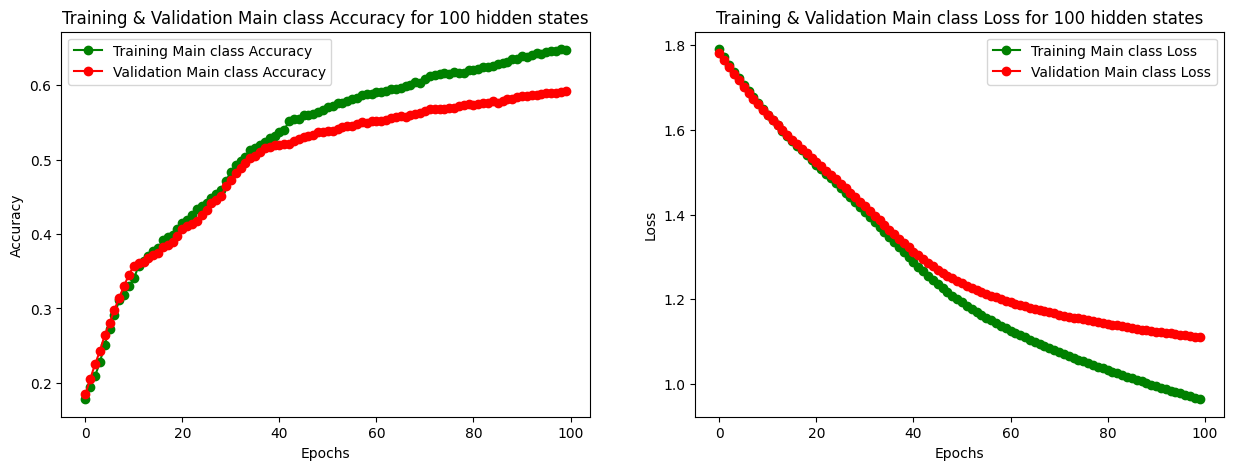

In [ ]:
epochs = [i for i in range(EPOCHS_FIRST_MODEL)]
fig , ax = plt.subplots(1,2)
train_acc = history_first_model.history['accuracy']
train_loss = history_first_model.history['loss']
val_acc = history_first_model.history['val_accuracy']
val_loss = history_first_model.history['val_loss']
fig.set_size_inches(15,5)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Main class Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Main class Accuracy')
ax[0].set_title(f'Training & Validation Main class Accuracy for {NUM_HIDDEN_STATES} hidden states')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Main class Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Main class Loss')
ax[1].set_title(f'Training & Validation Main class Loss for {NUM_HIDDEN_STATES} hidden states')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions = first_model.predict(test_padded)

16/16 [==============================] - 0s 2ms/step


In [ ]:
predictions.shape

(500, 6)

In [ ]:
predictions_mainclass = []
for x in predictions:
  predictions_mainclass.append(x.argmax())

predictions_mainclass = np.array(predictions_mainclass)
predictions_mainclass.shape

(500,)

In [ ]:
print(classification_report(labels_1_test,  predictions_mainclass))

              precision    recall  f1-score   support

           0       0.52      0.96      0.67       138
           1       0.59      0.40      0.48        94
           2       0.00      0.00      0.00         9
           3       0.56      0.43      0.49        65
           4       0.92      0.43      0.59       113
           5       0.59      0.56      0.57        81

    accuracy                           0.59       500
   macro avg       0.53      0.46      0.47       500
weighted avg       0.63      0.59      0.57       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


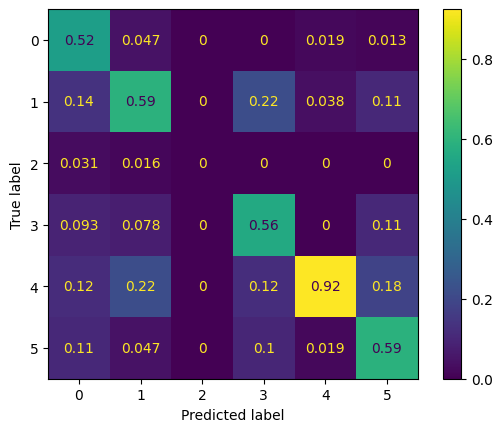

In [ ]:
result = confusion_matrix(labels_1_test, predictions_mainclass , normalize='pred')
disp = ConfusionMatrixDisplay(result)
disp.plot()

**Building Second Model**

In [66]:
#Building the base model
NUM_HEIDDEN_STATES = 100
input_layer =  Input(shape=(max_length+1,), name = 'input1')
embeddig = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length =max_length+1 ,trainable=False)(input_layer)
lstm = LSTM(NUM_HEIDDEN_STATES , return_sequences=True)(embeddig)

#subclass prediction
flat =  Flatten()(lstm[:,-1])
first_predictions = Dense(num_sub_class,activation='softmax',name='subclass')(flat)
#mainclass prediction
flat_2 = Flatten()(lstm[:,-2])
second_predictions = Dense(num_main_class,activation='softmax',name='mainclass')(flat_2)

second_model = Model(inputs=input_layer, outputs=[first_predictions , second_predictions] , name="Second_model")
opt = optimizers.Adam(learning_rate=1e-)
second_model.compile(optimizer=opt,
                    loss={
                          'subclass': 'sparse_categorical_crossentropy', 
                          'mainclass': 'sparse_categorical_crossentropy'
                          },
                    metrics={
                          'subclass': 'accuracy', 
                          'mainclass': 'accuracy'
                          })
second_model.summary()

Model: "Second_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 19)]         0           []                               
                                                                                                  
 embedding_7 (Embedding)        (None, 19, 300)      2072100     ['input1[0][0]']                 
                                                                                                  
 lstm_7 (LSTM)                  (None, 19, 100)      160400      ['embedding_7[0][0]']            
                                                                                                  
 tf.__operators__.getitem_12 (S  (None, 100)         0           ['lstm_7[0][0]']                 
 licingOpLambda)                                                                       

In [67]:
train_padded_model_2 = pad_sequences(train_padded, maxlen= max_length+1, padding= "post")
test_padded_model_2 = pad_sequences(test_padded, maxlen= max_length+1, padding= "post")

In [68]:
EPOCHS_SECOND_MODEL = 200
history = second_model.fit(x=train_padded_model_2,
	y={"subclass": labels_2_train, "mainclass": labels_1_train},
	validation_split=0.4,
	epochs=EPOCHS_SECOND_MODEL,
	verbose=1)

Epoch 1/200
103/103 [==============================] - 4s 18ms/step - loss: 5.6634 - subclass_loss: 3.8566 - mainclass_loss: 1.8068 - subclass_accuracy: 0.0177 - mainclass_accuracy: 0.1574 - val_loss: 5.6462 - val_subclass_loss: 3.8511 - val_mainclass_loss: 1.7951 - val_subclass_accuracy: 0.0229 - val_mainclass_accuracy: 0.1770
Epoch 2/200
103/103 [==============================] - 1s 10ms/step - loss: 5.6363 - subclass_loss: 3.8452 - mainclass_loss: 1.7911 - subclass_accuracy: 0.0266 - mainclass_accuracy: 0.1810 - val_loss: 5.6207 - val_subclass_loss: 3.8400 - val_mainclass_loss: 1.7807 - val_subclass_accuracy: 0.0321 - val_mainclass_accuracy: 0.2022
Epoch 3/200
103/103 [==============================] - 1s 11ms/step - loss: 5.6102 - subclass_loss: 3.8337 - mainclass_loss: 1.7765 - subclass_accuracy: 0.0410 - mainclass_accuracy: 0.2027 - val_loss: 5.5956 - val_subclass_loss: 3.8285 - val_mainclass_loss: 1.7672 - val_subclass_accuracy: 0.0486 - val_mainclass_accuracy: 0.2288
Epoch 4/20

In [63]:
history.history.keys()

dict_keys(['loss', 'subclass_loss', 'mainclass_loss', 'subclass_accuracy', 'mainclass_accuracy', 'val_loss', 'val_subclass_loss', 'val_mainclass_loss', 'val_subclass_accuracy', 'val_mainclass_accuracy'])

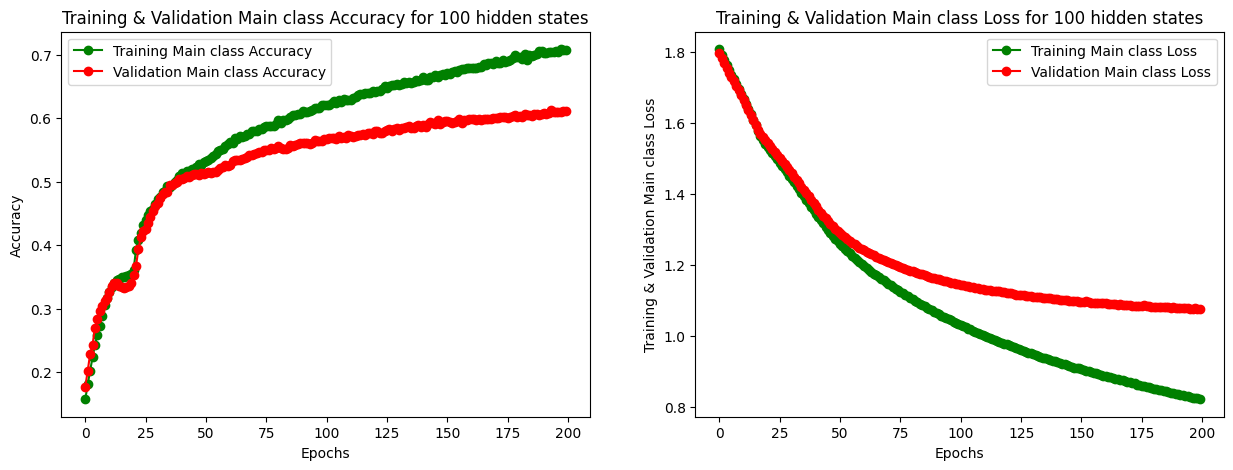

In [69]:
epochs = [i for i in range(EPOCHS_SECOND_MODEL)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['mainclass_accuracy']
train_loss = history.history['mainclass_loss']
val_acc = history.history['val_mainclass_accuracy']
val_loss = history.history['val_mainclass_loss']
fig.set_size_inches(15,5)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Main class Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Main class Accuracy')
ax[0].set_title(f'Training & Validation Main class Accuracy for {NUM_HEIDDEN_STATES} hidden states')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Main class Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Main class Loss')
ax[1].set_title(f'Training & Validation Main class Loss for {NUM_HEIDDEN_STATES} hidden states')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Main class Loss")
plt.show()

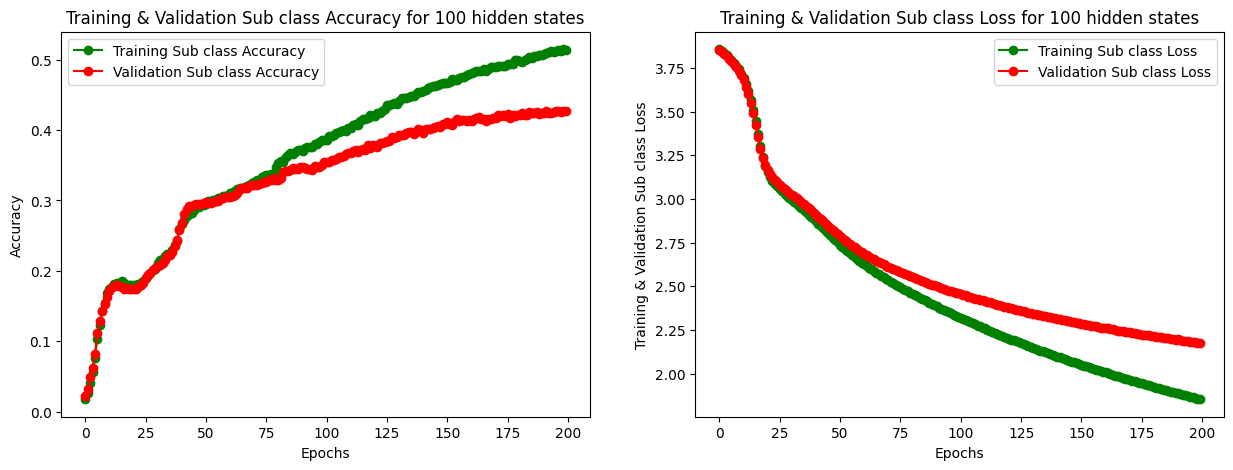

In [70]:
epochs = [i for i in range(EPOCHS_SECOND_MODEL)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['subclass_accuracy']
train_loss = history.history['subclass_loss']
val_acc = history.history['val_subclass_accuracy']
val_loss = history.history['val_subclass_loss']
fig.set_size_inches(15,5)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Sub class Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Sub class Accuracy')
ax[0].set_title(f'Training & Validation Sub class Accuracy for {NUM_HEIDDEN_STATES} hidden states')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Sub class Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Sub class Loss')
ax[1].set_title(f'Training & Validation Sub class Loss for {NUM_HEIDDEN_STATES} hidden states')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Sub class Loss")
plt.show()

In [71]:
predictions_socond_model = second_model.predict(test_padded_model_2)
predictions_subclass = predictions_socond_model[0]
predictions_mainclass = predictions_socond_model[1]


16/16 [==============================] - 0s 2ms/step


In [72]:
predictions_mainclass__ = []
for x in predictions_mainclass:
  predictions_mainclass__.append(x.argmax())

predictions_mainclass__ = np.array(predictions_mainclass__)
predictions_mainclass__.shape

(500,)

In [73]:
predictions_subclass__ = []
for x in predictions_subclass:
  predictions_subclass__.append(x.argmax())

predictions_subclass__ = np.array(predictions_subclass__)
predictions_subclass__.shape

(500,)

In [74]:
print(classification_report(labels_1_test,  predictions_mainclass__))

              precision    recall  f1-score   support

           0       0.53      0.95      0.68       138
           1       0.66      0.44      0.53        94
           2       0.00      0.00      0.00         9
           3       0.56      0.51      0.53        65
           4       0.92      0.42      0.57       113
           5       0.60      0.59      0.60        81

    accuracy                           0.60       500
   macro avg       0.55      0.48      0.48       500
weighted avg       0.65      0.60      0.58       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
print(classification_report(labels_2_test,  predictions_subclass__))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         8
           4       0.45      0.62      0.52        55
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         1
           7       0.54      0.92      0.68       123
           8       0.74      0.36      0.49        47
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         2
          11       0.45      0.71      0.56         7
          12       0.20      0.20      0.20        10
          13       0.67      0.89      0.76         9
          14       0.35      0.57      0.43        74
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         3
          19       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

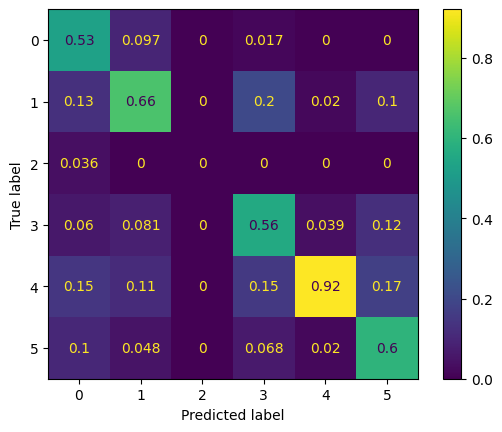

In [76]:
result_0 = confusion_matrix(labels_1_test, predictions_mainclass__ , normalize='pred')
disp_0 = ConfusionMatrixDisplay(result_0)
disp_0.plot()

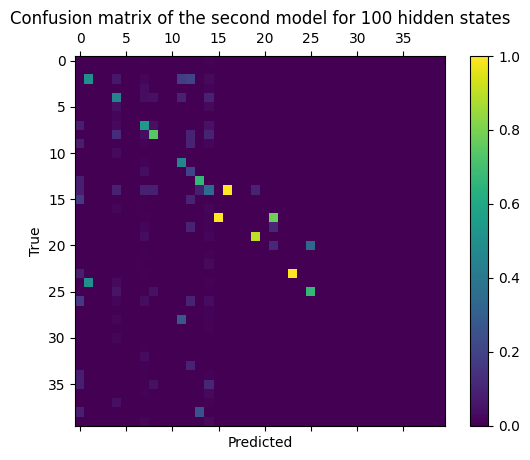

In [77]:
result_1 = confusion_matrix(labels_2_test, predictions_subclass__ , normalize='pred')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(result_1)
plt.title(f'Confusion matrix of the second model for {NUM_HEIDDEN_STATES} hidden states')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Creating Responder**

In [13]:
def preprocess_responder(df_train , pad_post=False,answer=False):
  ''' 

    Preprocessing for Questions given to the network
  
  '''
  #convert to lower case
  df_train["lower_text_doc"]= df_train.text.map(lambda x: x.lower())

  #word tokanize
  df_train["tokenized_doc"]= df_train.lower_text_doc.map(nltk.word_tokenize)

  #remove stop words
  stop= stopwords.words("english")
  stop_punc= list(set(punctuation))+ stop

  df_train["selected_doc"]= df_train.tokenized_doc.map(lambda df: remove_stop(df, stop_punc))


  #stemming
  stemmer= PorterStemmer()

  df_train["stemmed_doc"]= df_train.selected_doc.map(lambda xs: [stemmer.stem(x) for x in xs])
  df_train["normalized_doc"]= df_train.stemmed_doc.apply(normalize)



  #Tokenize with tensorflow
  tokenizer_doc= Tokenizer(num_words= 10000)
  tokenizer_doc.fit_on_texts(df_train.normalized_doc)

  tokenized_doc_train= tokenizer_doc.texts_to_sequences(df_train.normalized_doc)

  vocab_size_doc = tokenizer_doc.word_index.keys().__len__() +1
  max_length_doc = len(max(tokenized_doc_train, key=len))

  #padding
  train_doc_padded= pad_sequences(tokenized_doc_train, maxlen= 12, padding= "pre")

  #padding for sub class
  if(pad_post):
    train_doc_padded = pad_sequences(train_doc_padded, maxlen= 11+1, padding= "post")

 
  if not answer:
    return tokenizer_doc,train_doc_padded,vocab_size_doc,max_length_doc

  ''' 

    Preprocessing for Answers
  
  '''
  #convert to lower case
  df_train["lower_text_ans"]= df_train.answer.map(lambda x: x.lower())

  #word tokanize
  df_train["tokenized_ans"]= df_train.lower_text_ans.map(nltk.word_tokenize)

  #remove stop words
  stop= stopwords.words("english")
  stop_punc= list(set(punctuation))+ stop

  df_train["selected_ans"]= df_train.tokenized_ans.map(lambda df: remove_stop(df, stop_punc))


  #stemming
  stemmer= PorterStemmer()

  df_train["stemmed_ans"]= df_train.selected_ans.map(lambda xs: [stemmer.stem(x) for x in xs])
  df_train["normalized_ans"]= df_train.stemmed_ans.apply(normalize)


  #Tokenize with tensorflow
  tokenizer_ans= Tokenizer(num_words= 10000)
  tokenizer_ans.fit_on_texts(df_train.normalized_ans)

  tokenized_ans_train= tokenizer_ans.texts_to_sequences(df_train.normalized_ans)

  vocab_size_ans = tokenizer_ans.word_index.keys().__len__() +1
  max_length_ans = len(max(tokenized_ans_train, key=len))

  #padding
  train_ans_padded= pad_sequences(tokenized_ans_train, maxlen= max_length_doc, padding= "pre")

    
  return tokenizer_doc,train_doc_padded,vocab_size_doc,max_length_doc,tokenizer_ans,train_ans_padded,max_length_ans,vocab_size_ans


In [14]:
df_responder = pd.read_csv('/content/drive/MyDrive/NeuralNetwork2023/Hw04/QA_data.csv', encoding= 'unicode_escape')

In [18]:
tokenizer_doc,\
train_doc,\
vocab_size_doc,\
max_len_doc,\
tokenizer_ans,train_ans,\
max_len_ans ,vocab_size_ans=preprocess_responder(df_responder, True,True)

In [19]:
vocab_size_ans

781

In [20]:
#create a weight matrix for words in training 
embedding_matrix_responder = np.zeros((vocab_size_doc, 300))
for word, i in tokenizer_doc.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix_responder[i] = embedding_vector

In [21]:
embedding_matrix_responder.shape

(958, 300)

In [22]:
train_ans.shape

(500, 11)

In [23]:
latent_size_1 = 100
latent_size_2 = 25

#Building the base model
input_layer=  Input(shape=(max_len_doc+1,), name = 'input_layer')

embedding_layer = Embedding(vocab_size_doc, 300, weights=[embedding_matrix_responder], input_length =max_len_doc+1 ,trainable=False)(input_layer)

#Intention Classifier
lstm = LSTM(latent_size_1 , return_sequences=True)(embedding_layer)
#subclass prediction
subclass_h = lstm[:,-1]
#mainclass prediction
mainclass_h = lstm[:,-2]


#Responder
responder_states =[mainclass_h, subclass_h,mainclass_h, subclass_h]

bidirectional_lstm = Bidirectional(LSTM(latent_size_1, return_sequences=True),                                                         
                               merge_mode="concat",
                               name="responder_lstm")(embedding_layer[:,:-1], initial_state=responder_states)

#Answer prediction
outputs = Dense(vocab_size_ans, activation='softmax', name="Dense_layer")(bidirectional_lstm)


answer_prediction_model = Model(input_layer, outputs, name="Responder")
answer_prediction_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
           

answer_prediction_model.summary()



Model: "Responder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 12)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 12, 300)      287400      ['input_layer[0][0]']            
                                                                                                  
 lstm (LSTM)                    (None, 12, 100)      160400      ['embedding[0][0]']              
                                                                                                  
 tf.__operators__.getitem_2 (Sl  (None, 11, 300)     0           ['embedding[0][0]']              
 icingOpLambda)                                                                           

In [24]:
train_ans_data =[]
for sent in train_ans:
  temp =[]
  for word in sent:
    b = np.zeros(vocab_size_ans)
    b[int(word)] = 1
    temp.append(b)
  train_ans_data.append(temp)

train_ans_data =np.array(train_ans_data)
print(train_ans_data.shape)
  

(500, 11, 781)


In [25]:
history_responder = answer_prediction_model.fit(x=train_doc,
                      y=train_ans_data,
                      epochs=60,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/60
13/13 [==============================] - 13s 133ms/step - loss: 6.4169 - accuracy: 0.6255 - val_loss: 5.5739 - val_accuracy: 0.7973
Epoch 2/60
13/13 [==============================] - 0s 15ms/step - loss: 3.4228 - accuracy: 0.8159 - val_loss: 1.7114 - val_accuracy: 0.8091
Epoch 3/60
13/13 [==============================] - 0s 14ms/step - loss: 1.4821 - accuracy: 0.8218 - val_loss: 1.6515 - val_accuracy: 0.8091
Epoch 4/60
13/13 [==============================] - 0s 13ms/step - loss: 1.3325 - accuracy: 0.8218 - val_loss: 1.6896 - val_accuracy: 0.8091
Epoch 5/60
13/13 [==============================] - 0s 15ms/step - loss: 1.2861 - accuracy: 0.8218 - val_loss: 1.7388 - val_accuracy: 0.8091
Epoch 6/60
13/13 [==============================] - 0s 13ms/step - loss: 1.2604 - accuracy: 0.8218 - val_loss: 1.7543 - val_accuracy: 0.8091
Epoch 7/60
13/13 [==============================] - 0s 16ms/step - loss: 1.2437 - accuracy: 0.8218 - val_loss: 1.7860 - val_accuracy: 0.8091
Epoch 8/60


In [26]:
test_questions=['How many people speak French?',
           'What day is today?',
           'Who will win the war?','Who is Italian first minister?',
           'When World War II ended?',
           'When Gandhi was assassinated?']

In [27]:
quest_df = pd.DataFrame(data={'text':test_questions})

In [28]:
quest_df

,text
0,How many people speak French?
1,What day is today?
2,Who will win the war?
3,Who is Italian first minister?
4,When World War II ended?
5,When Gandhi was assassinated?


In [29]:
tokenizer_que,que_padded,vocab_size_que,max_length_que = preprocess_responder(quest_df, True,False)

In [30]:
que_padded.shape

(6, 12)

In [31]:
answer = answer_prediction_model.predict(que_padded)

1/1 [==============================] - 1s 1s/step


In [32]:
answer.shape

(6, 11, 781)

In [33]:
# answer.shape
answer__= np.argmax(answer, axis=2)
answer__.shape

(6, 11)

In [34]:
# Creating a reverse dictionary
reverse_word_map = dict(map(reversed, tokenizer_ans.word_index.items()))

for idi , ans in enumerate(answer__):
  
  # Function takes a tokenized sentence and returns the words
  def sequence_to_text(list_of_indices):
      list_of_indices = list_of_indices[list_of_indices != 0]
      if list_of_indices.size == 0:
        return ""
      # Looking up words in dictionary
      words = [reverse_word_map.get(letter) for letter in list_of_indices]
      return(words[0])

  # Creating texts 
  my_texts = list(map(sequence_to_text, ans))
  str_list = list(filter(None, my_texts))

  print("Question: " , test_questions[idi])
  if len(str_list) == 0:
    print("No Answer")
  else:
    print(str_list[0])

  print("************")

Question:  How many people speak French?
caffein
************
Question:  What day is today?
9
************
Question:  Who will win the war?
narrow
************
Question:  Who is Italian first minister?
blue
************
Question:  When World War II ended?
dollar
************
Question:  When Gandhi was assassinated?
metal
************


In [35]:
reverse_word_map

{1: '1',
 2: 'mile',
 3: 'feet',
 4: '7',
 5: 'new',
 6: 'blood',
 7: 'red',
 8: 'acid',
 9: 'million',
 10: '6',
 11: 'john',
 12: 'damag',
 13: 'disord',
 14: '3',
 15: '5',
 16: 'st',
 17: 'yellow',
 18: 'york',
 19: 'june',
 20: 'organ',
 21: 'sunlight',
 22: 'pari',
 23: 'roosevelt',
 24: '80',
 25: '2',
 26: 'week',
 27: 'substanc',
 28: '9',
 29: '42',
 30: '25',
 31: '20',
 32: 'year',
 33: '60',
 34: 'william',
 35: 'scale',
 36: 'billion',
 37: '15',
 38: 'brown',
 39: 'citi',
 40: 'richard',
 41: 'mar',
 42: 'second',
 43: 'infect',
 44: 'high',
 45: 'pressur',
 46: 'measur',
 47: 'lung',
 48: 'black',
 49: '220',
 50: 'particl',
 51: 'element',
 52: 'franklin',
 53: 'lb',
 54: '1890',
 55: '1912',
 56: 'edwin',
 57: 'life',
 58: 'job',
 59: 'western',
 60: 'mph',
 61: 'unit',
 62: 'state',
 63: 'anim',
 64: '1960',
 65: '21',
 66: 'river',
 67: 'muscl',
 68: 'insect',
 69: '8',
 70: 'australian',
 71: 'a',
 72: 'resist',
 73: 'plant',
 74: '1945',
 75: 'studi',
 76: 'carlso